![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions:

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [84]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt 

# Setting display options for no of rows & columns 
pd.options.display.max_rows = 75 
pd.options.display.max_columns = 75 

# Load the CSV file and store as netflix_df
netflix_df = pd.read_csv('netflix_data.csv', parse_dates=['date_added', 'release_year'])
netflix_df.release_year = netflix_df.release_year.dt.year
netflix_df.head()
netflix_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7787 non-null   object        
 1   type          7787 non-null   object        
 2   title         7787 non-null   object        
 3   director      5398 non-null   object        
 4   cast          7069 non-null   object        
 5   country       7280 non-null   object        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7787 non-null   int64         
 8   duration      7787 non-null   int64         
 9   description   7787 non-null   object        
 10  genre         7787 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 669.3+ KB


color  release_year
black  1980            127.250000
       1981            128.750000
       1982            126.714286
       1983            119.500000
       1984            132.888889
                          ...    
red    2017             78.488889
       2018             82.127273
       2019             71.507246
       2020             65.513158
       2021             85.000000
Name: duration, Length: 126, dtype: float64


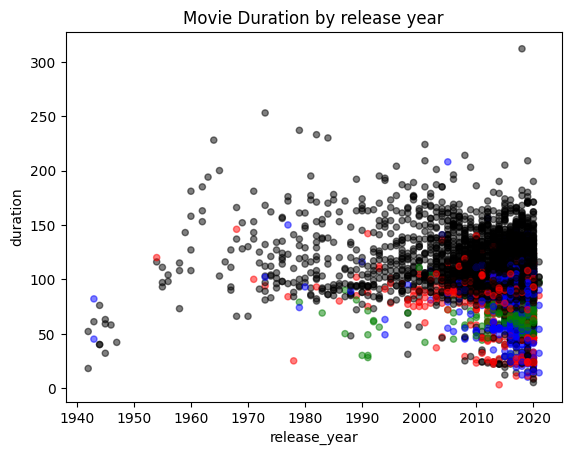

In [85]:
# Filter the data to remove TV shows and store as netflix_subset 
netflix_subset = netflix_df.loc[netflix_df.type != 'TV Show'] 

# Save columns of interest into a new dataframe 
netflix_movies = netflix_subset.loc[:, ["title", "country", "genre", "release_year", "duration"]]

# Filter netflix_movies to find the movies that are strictly shorter than 60 minutes, saving the resulting DataFrame as short_movies; inspect the result to find possible contributing factors.
short_movies = netflix_movies.query("duration < 60") 
netflix_movies.genre.unique().tolist()
# Create color codes for genres in 'Children', 'Documentaries', 'Stand-Up', and the rest 
netflix_movies['color'] = netflix_movies.genre.replace(['Children', 'Documentaries', 'Stand-Up'], ['red', 'blue', 'green'])
netflix_movies.loc[~netflix_movies.color.isin(['red', 'blue', 'green']), 'color'] = 'black'

# Check mean duration by color codes and release_year from 1980 onwards to check trends in duration    
print(netflix_movies.query("release_year > 1979").groupby(['color', 'release_year']).duration.mean() )
# It appears the average movie durations for genres that are not 'Children', 'Documentaries', or 'Stand-Up' have remained more than 100 minutes, and hence it can be concluded that movies are not getting really short, just that there are more of above genres being released bringing the overall average duration down 

# Create a scatter plot of duration versus release_year
netflix_movies.plot(kind='scatter', x='release_year', y='duration', c='color', alpha=0.5, title='Movie Duration by release year') 

# Are we certain that movies are getting shorter 
answer = 'no' 
